# Data Processing and ML Model
## Table of Contents
- #### <a href="#dp" style='color:black; text-decoration:none'>Data Processing</a>
<ul>
<li><a href="#ohe">One Hot Encoding</a></li>
<li><a href="#rfe">Recrussive Feature Elimation</a></li>
<li><a href="#dos">Data Oversampling</a></li>
</ul>
- #### <a href="#mml" style='color:black; text-decoration:none'>ML Models</a>
<ul>
<li><a href="#lr">Logistic Regression</a></li>
<li><a href="#rfc">Random Forest Classifier</a></li>
<li><a href="#svm">Support Vector Machines</a></li>
<li><a href="#dtc">Decision Tree Classifier</a></li>
<li><a href="#gb">Gradient Booster</a></li>
<li><a href="#knn">KNeighbors Classifier</a></li>
</ul>
- #### <a href="#me" style='color:black; text-decoration:none' >Models Evaluation</a>
- #### <a href="#hpt" style='color:black; text-decoration:none'>Hyperparameter tunnig</a>
<ul>
<li><a href="#lrhpt">Logistic Regression parameter tunnig</a></li>
<li><a href="#xgbhpt">XGBooster parameter tunnig</a></li>
</ul>
- #### <a href="#conclusion" style='color:black; text-decoration:none' >Summary</a>


<a name="dp"></a>
# Data Processing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../Datasets/clean_dataset')

In [3]:
df.head(4)

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,bmi_cat,Gcs,gcs_cat,age_cat,h1_pluse_P,heart_rate_cat,map_cat
0,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,Sepsis,Cardiovascular,0,normal,13.0,mild,old_adult,high,high,low
1,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,Respiratory,Respiratory,0,overweight,5.0,sever,old_adult,low,high,low
2,67.0,27.56,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,Neurological,Neurologic,0,overweight,15.0,normal,old_adult,normal,high,high
3,70.0,29.00,0,Caucasian,M,165.0,Accident & Emergency,admit,Med-Surg ICU,0.002083,...,Sepsis,Cardiovascular,0,overweight,15.0,normal,old_adult,normal,high,normal


In [4]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 61123
number of columns are: 84


> Most of these columns are repeatatives of other column  while some columns that start with d1_ are data recorded after 24 hours we are trying to predict patient survival in the first few hiurs of ICU admission inorder to priotise anad redeploy limited resources. 


In [5]:
# drop highly correclected and repeated columns
df=df.drop(columns=['d1_diasbp_min', 'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min', 'd1_heartrate_max',
                    'd1_heartrate_min','d1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max','d1_mbp_noninvasive_min'
                    , 'd1_resprate_max', 'd1_resprate_min','d1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
                    'd1_sysbp_min','d1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
                    'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min','h1_diasbp_max', 'h1_diasbp_min',
                    'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min','h1_heartrate_max', 
                    'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min','h1_mbp_noninvasive_max', 
                    'h1_mbp_noninvasive_min','h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max','h1_sysbp_min',
                    'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min','d1_glucose_max', 'd1_glucose_min',
                    'd1_potassium_max','d1_potassium_min','age','weight','height','apache_2_diagnosis',
                    'apache_2_bodysystem','intubated_apache','d1_diasbp_max','h1_resprate_max', 'h1_resprate_min',
                    'gcs_unable_apache','heart_rate_apache','Gcs','bmi','apache_post_operative','cirrhosis',
                    'apache_4a_hospital_death_prob','elective_surgery','resprate_apache','map_apache'])

In [6]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 61123
number of columns are: 26


<a name="ohe"></a>
## One Hot Encoding

In [7]:
# one hot encoding object and categorical columns
cols=df.columns[(df.dtypes=='object') | (df.dtypes=='category')]
print(cols)
cat_col=df[cols]

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'bmi_cat', 'gcs_cat', 'age_cat', 'h1_pluse_P',
       'heart_rate_cat', 'map_cat'],
      dtype='object')


In [8]:
x=pd.get_dummies(cat_col) # convert categorical columns to dummies
df=df.drop(cols, axis=1) # drop original columns
df=df.join(x) #join dummies

In [9]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 61123
number of columns are: 70


<a home="rfe"></a>
## Recrussive Feature Elimation

In [10]:
#Seperating dependent and independent feature
X=df.drop('hospital_death', axis=1)
y=df['hospital_death']

In [11]:
#import rfe
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [12]:
#fit rfe with X and y
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=16 )
rfe = rfe.fit(X,y)

In [13]:
rfe_in = rfe.get_support() # get the index of the top useful columns
X=X[X.columns[rfe_in]] # make a data frame of the new features
X.columns 

Index(['arf_apache', 'ventilated_apache', 'apache_4a_icu_death_prob',
       'hepatic_failure', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis',
       'icu_admit_source_Operating Room / Recovery',
       'icu_admit_source_Other ICU', 'apache_3j_bodysystem_Metabolic',
       'bmi_cat_underweight', 'gcs_cat_normal', 'age_cat_old_adult',
       'age_cat_young_adult', 'h1_pluse_P_low', 'heart_rate_cat_high'],
      dtype='object')

In [14]:
# statmodles
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.282789
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         hospital_death   No. Observations:                61123
Model:                          Logit   Df Residuals:                    61107
Method:                           MLE   Df Model:                           15
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                 0.05603
Time:                        15:42:06   Log-Likelihood:                -17285.
converged:                       True   LL-Null:                       -18311.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
arf_apache                                  

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

<a home="dos"></a>
## Data Oversampling

In [15]:
# Split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train['hospital_death']=y_train # combine y_train back to oversample imbalance in dataset
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = X_train[X_train['hospital_death']==0]
df_minority = X_train[X_train['hospital_death']==1]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=44611,    # to match majority class
                                 random_state=123) # reproducible results
X_train= pd.concat([df_majority, df_minority_upsampled])

In [17]:
# seperataing back
y_train=X_train['hospital_death']
X_train=X_train.drop('hospital_death', axis=1)

<a home="mml"></a>
# ML Models

In [18]:
# initalised empty list to append model metrics 
models = []
roc_aucs = []
recalls = []

In [19]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

<a name="lr"></a>
## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
models.append('LogisticRegression')

In [21]:
lr_model = lr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [22]:
roc_aucs.append(roc_auc_score(y_test, lr_pred))
recalls.append(metrics.recall_score(y_test,lr_pred))

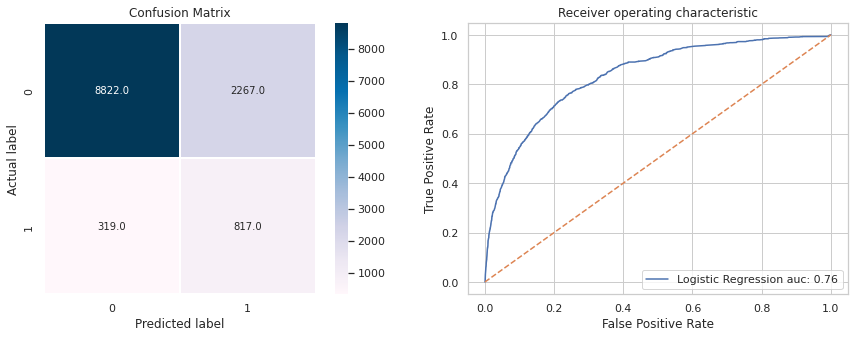

In [23]:
plt.figure(figsize=(15,5))
#evaluation with area under curve and confusion matrics
ax1=plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu', ax=ax1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

ax2=plt.subplot(1, 2, 2)
logit_roc_auc = roc_auc_score(y_test, lr_pred)
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, label=f'Logistic Regression auc: {round(logit_roc_auc,2)}', ax=ax2)
sns.lineplot([0, 1], [0, 1], ax=ax2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

In [24]:
print('classification_report for Logistic Regression', '\n')
print(classification_report(y_test, lr_pred))

classification_report for Logistic Regression 

              precision    recall  f1-score   support

           0       0.97      0.80      0.87     11089
           1       0.26      0.72      0.39      1136

    accuracy                           0.79     12225
   macro avg       0.62      0.76      0.63     12225
weighted avg       0.90      0.79      0.83     12225



<a name="rfc"></a>
## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=42)
models.append('RandomForest')

In [26]:
rf_model = rf.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [27]:
roc_aucs.append(roc_auc_score(y_test, rf_pred))
recalls.append(metrics.recall_score(y_test, rf_pred))

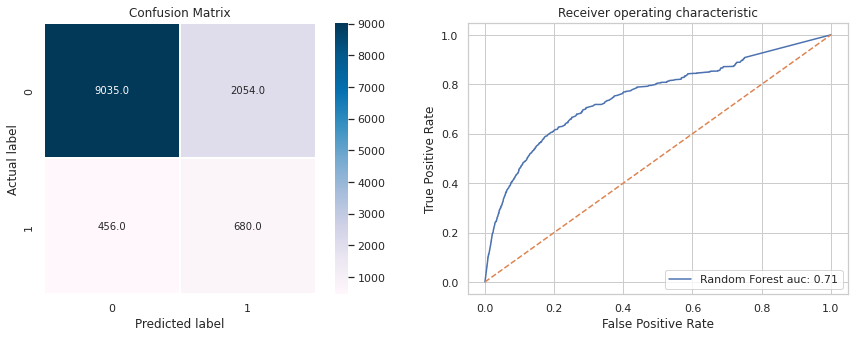

In [28]:
plt.figure(figsize=(15,5))
#evaluation with area under curve and confusion matrics
ax1=plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu', ax=ax1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

ax2=plt.subplot(1, 2, 2)
logit_roc_auc = roc_auc_score(y_test, rf_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, label=f'Random Forest auc: {round(logit_roc_auc,2)}', ax=ax2)
sns.lineplot([0, 1], [0, 1], ax=ax2,linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

In [29]:
print('classification_report for Random Forest', '\n')
print(classification_report(y_test, rf_pred))

classification_report for Random Forest 

              precision    recall  f1-score   support

           0       0.95      0.81      0.88     11089
           1       0.25      0.60      0.35      1136

    accuracy                           0.79     12225
   macro avg       0.60      0.71      0.61     12225
weighted avg       0.89      0.79      0.83     12225



<a name="svm"></a>
## Support Vector Machines

In [30]:
from sklearn.svm import SVC
svm = SVC()
models.append('SupportVector' )

In [31]:
svm_model=svm.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [32]:
roc_aucs.append(roc_auc_score(y_test, svm_pred))
recalls.append(metrics.recall_score(y_test, svm_pred))

In [33]:
# plt.figure(figsize=(15,5))
##evaluation with area under curve and confusion matrics
# ax1=plt.subplot(1, 2, 1)
# cm = confusion_matrix(y_test, svm_pred)
# sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu', ax=ax1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# plt.title('Confusion Matrix')

# ax2=plt.subplot(1, 2, 2)
# logit_roc_auc = roc_auc_score(y_test, svm_pred)
# fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
# sns.lineplot(fpr, tpr, label=f'Support Vector Machines auc: {round(logit_roc_auc,2)}', ax=ax2)
# sns.lineplot([0, 1], [0, 1], ax=ax2, linestyle='--')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right");

In [34]:
print('classification_report for Support Vector Machines', '\n')
print(classification_report(y_test, svm_pred))

classification_report for Support Vector Machines 

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     11089
           1       0.26      0.71      0.38      1136

    accuracy                           0.79     12225
   macro avg       0.61      0.75      0.63     12225
weighted avg       0.90      0.79      0.83     12225



<a name="dtc"></a>
## Decision Tree Classifier

In [35]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
models.append('DecisionTree')

In [36]:
dt_model=dt.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [37]:
roc_aucs.append(roc_auc_score(y_test, dt_pred))
recalls.append(metrics.recall_score(y_test, dt_pred))

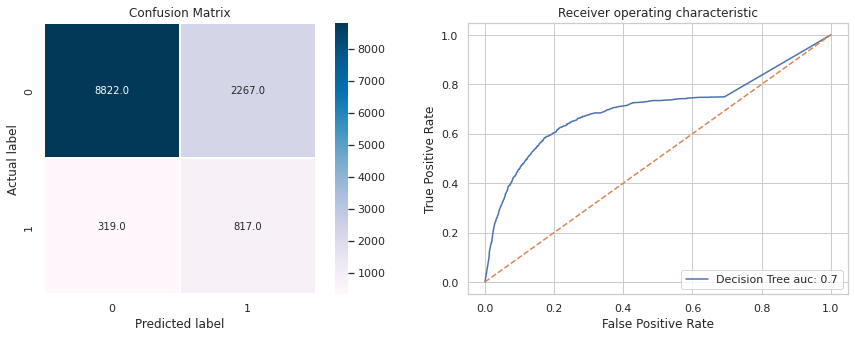

In [38]:
plt.figure(figsize=(15,5))
#evaluation with area under curve and confusion matrics
ax1=plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu', ax=ax1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

ax2=plt.subplot(1, 2, 2)
logit_roc_auc = roc_auc_score(y_test, dt_pred)
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, label=f'Decision Tree auc: {round(logit_roc_auc,2)}', ax=ax2)
sns.lineplot([0, 1], [0, 1], ax=ax2,linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

In [39]:
print('classification_report for Decision Tree', '\n')
print(classification_report(y_test, dt_pred))

classification_report for Decision Tree 

              precision    recall  f1-score   support

           0       0.95      0.81      0.88     11089
           1       0.24      0.59      0.35      1136

    accuracy                           0.79     12225
   macro avg       0.60      0.70      0.61     12225
weighted avg       0.89      0.79      0.83     12225



<a name="gb"></a>
## Gradient Booster

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()
models.append('XGBClassifier')

In [41]:
xgb_model=xgb.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [43]:
roc_aucs.append(roc_auc_score(y_test, xgb_pred))
recalls.append(metrics.recall_score(y_test, xgb_pred))

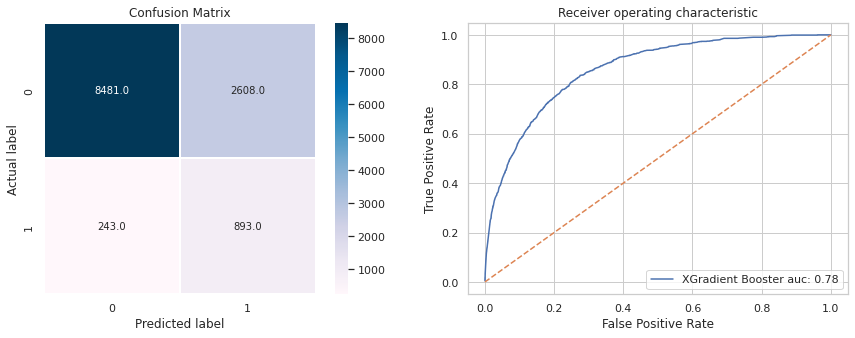

In [44]:
plt.figure(figsize=(15,5))
#evaluation with area under curve and confusion matrics
ax1=plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu', ax=ax1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

ax2=plt.subplot(1, 2, 2)
logit_roc_auc = roc_auc_score(y_test, xgb_pred)
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, label=f'XGradient Booster auc: {round(logit_roc_auc,2)}', ax=ax2)
sns.lineplot([0, 1], [0, 1], ax=ax2,linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

In [45]:
print('classification_report for Gradient Booster, \n')
print(classification_report(y_test, xgb_pred))

classification_report for Gradient Booster, 

              precision    recall  f1-score   support

           0       0.97      0.76      0.86     11089
           1       0.26      0.79      0.39      1136

    accuracy                           0.77     12225
   macro avg       0.61      0.78      0.62     12225
weighted avg       0.91      0.77      0.81     12225



<a name="knn"></a>
## KNeighbors Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
models.append('KNeighbors')

In [47]:
knn_model=knn.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [48]:
roc_aucs.append(roc_auc_score(y_test, knn_pred))
recalls.append(metrics.recall_score(y_test, knn_pred))

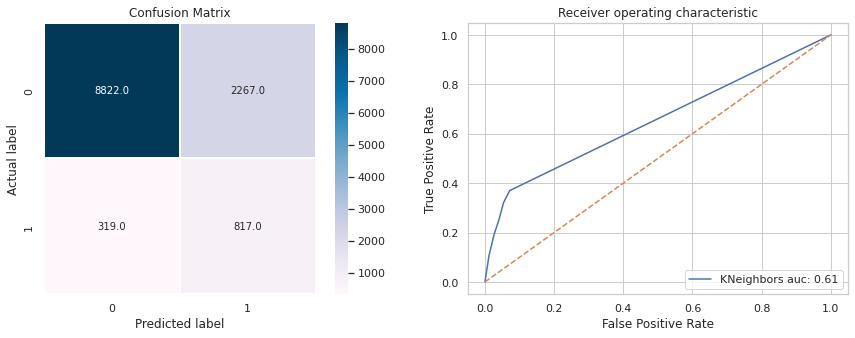

In [49]:
plt.figure(figsize=(15,5))
#evaluation with area under curve and confusion matrics
ax1=plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu', ax=ax1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

ax2=plt.subplot(1, 2, 2)
logit_roc_auc = roc_auc_score(y_test, knn_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, label=f'KNeighbors auc: {round(logit_roc_auc,2)}', ax=ax2)
sns.lineplot([0, 1], [0, 1], ax=ax2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

In [50]:
print('classification_report for KNeighbors, \n')
print(classification_report(y_test, knn_pred))

classification_report for KNeighbors, 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11089
           1       0.39      0.26      0.31      1136

    accuracy                           0.89     12225
   macro avg       0.66      0.61      0.63     12225
weighted avg       0.88      0.89      0.88     12225



<a name="ml></a>
## Model Evaluation

In [51]:
#creates a dataframe of model AUC and recalls
model_metrics = pd.DataFrame({
    'models' : models,
    'roc_aucs' : roc_aucs,
    'recalls' : recalls
})
model_metrics

,models,roc_aucs,recalls
0,LogisticRegression,0.757377,0.719190
1,RandomForest,0.706681,0.598592
2,SupportVector,0.753585,0.712148
3,DecisionTree,0.702632,0.594190
4,XGBClassifier,0.775452,0.786092
5,KNeighbors,0.607780,0.257042


In [52]:
model_metrics.to_csv('../Datasets/model_metrics.csv', index=False)

In [53]:
model_metrics=round(pd.read_csv('../Datasets/model_metrics.csv'),2)

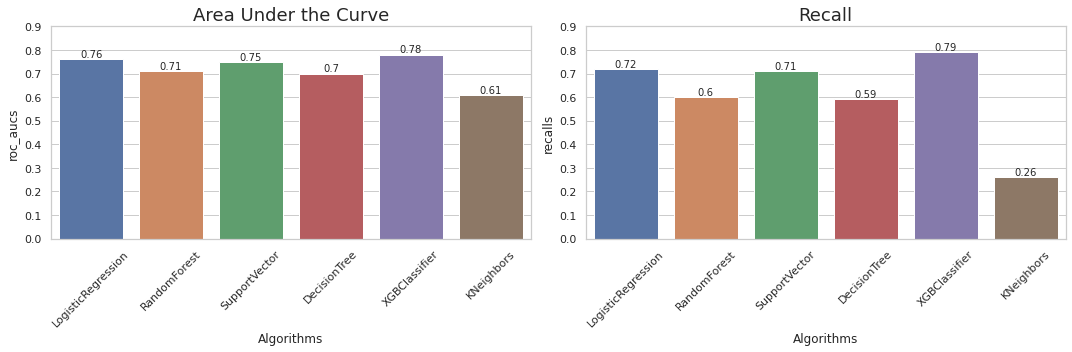

In [54]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1, 2, 1)
ax=sns.barplot(data=model_metrics, x='models', y='roc_aucs', ax=ax1)
plt.xlabel('Algorithms')
plt.title('Area Under the Curve', fontsize=18)
plt.ylim([0.0, 0.9])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

ax2=plt.subplot(1, 2, 2)
ax=sns.barplot(data=model_metrics, x='models', y='recalls', ax=ax2)
plt.xlabel('Algorithms')
plt.title('Recall', fontsize=18)
plt.ylim([0.0, 0.9])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout();

From the grapha above, Gradient Booster classifer has the highest area under the curve of ```0.78``` on test data and a recall of ```0.79```. Logistic Regression followed closely with area under the curve of ```0.76``` and a recall of ```0.72```. Both Gradient Booster classifer and Logistic Regression  will therefore be tunned for best parameters.

<a name="hpt"></a>
##  Hyperparameter Tuning.

In [55]:
from sklearn.model_selection import RandomizedSearchCV

<a name="lrpt"></a>
### Logistic Regression Parameters Tuning

> Logistic regression does not really have any critical hyperparameters to tune.
Sometimes, you can see useful differences in performance or convergence with different solvers (solver). ```newton-cg, lbfgs, liblinear```.
> Regularization (penalty) can sometimes be helpful. penalty in ```none, l1, l2```.
> The C parameter controls the penality strength, which can also be effective. ```100, 10, 1.0, 0.1, 0.01```


In [56]:
parameters ={ # Setting training with parameters
    "C":[100, 10, 1.0, 0.1, 0.01],
    'penalty':['l2'], 
    'solver':['newton-cg', 'lbfgs', 'liblinear']} # l1 lasso l2 ridge
lr=LogisticRegression()
rscv = RandomizedSearchCV(lr,parameters,scoring='roc_auc',cv=10)
lr_cv = rscv.fit(X_train,y_train)
lr_cv.best_params_ #best parameter

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}

In [57]:
lr_cv_pred = lr_cv.predict(X_test) #predict on X test with best parameter

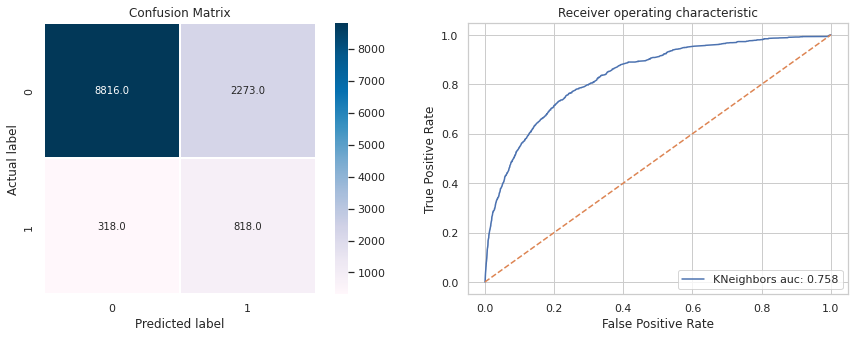

In [58]:
plt.figure(figsize=(15,5))
#evaluation with area under curve and confusion matrics
ax1=plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, lr_cv_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu', ax=ax1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

ax2=plt.subplot(1, 2, 2)
logit_roc_auc = roc_auc_score(y_test, lr_cv_pred)
fpr, tpr, thresholds = roc_curve(y_test, lr_cv.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, label=f'KNeighbors auc: {round(logit_roc_auc,3)}', ax=ax2)
sns.lineplot([0, 1], [0, 1], ax=ax2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

In [59]:
print('classification_report for Tuned Logistic Regression, \n')
print(classification_report(y_test, lr_cv_pred))

classification_report for Tuned Logistic Regression, 

              precision    recall  f1-score   support

           0       0.97      0.80      0.87     11089
           1       0.26      0.72      0.39      1136

    accuracy                           0.79     12225
   macro avg       0.61      0.76      0.63     12225
weighted avg       0.90      0.79      0.83     12225



<a name="xgbpt"></a>
### Gradient Boosting Machine Parameters Tuning 

>Also called XGBoost has many parameters to tune.
There are some parameter pairings that are important to consider. The first is the learning rate, also called shrinkage or eta (learning_rate) and the number of trees in the model (n_estimators). Both could be considered on a log scale, although in different directions. ```learning_rate in [0.001, 0.01, 0.1]```  and ```n_estimators [10, 100, 1000]```

>Another pairing is the number of rows or subset of the data to consider for each tree (subsample) and the depth of each tree (max_depth). ```subsample in [0.5, 0.3, 0.1]```  and ```max_depth in [3, 7, 9]```
For the full list of hyperparameters, see: ```sklearn.ensemble.GradientBoostingClassifier API.```

In [60]:
parameters ={# Setting training with parameters
    "learning_rate":[0.001, 0.01, 0.1],
    'n_estimators':[10, 100, 1000], 
    'subsample':[0.5, 0.3, 0.1],
    'max_depth':[3, 7, 9],}
xgb=GradientBoostingClassifier()
xgbcv = RandomizedSearchCV(xgb,parameters,scoring='roc_auc',cv=3, n_iter=3)
xgb_cv = xgbcv.fit(X_train,y_train)
xgb_cv.best_params_  #best parameter

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01}

In [61]:
xgb_cv_pred = xgb_cv.predict(X_test) # predict on X test with best parameter

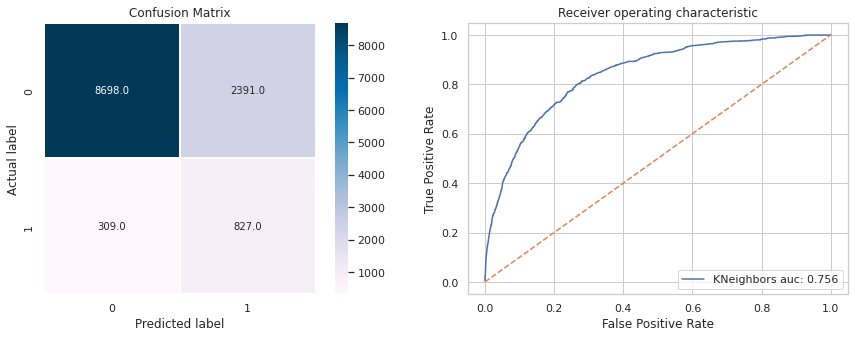

In [62]:
plt.figure(figsize=(15,5))
#evaluation with area under curve and confusion matrics
ax1=plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, xgb_cv_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu', ax=ax1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

ax2=plt.subplot(1, 2, 2)
logit_roc_auc = roc_auc_score(y_test, xgb_cv_pred)
fpr, tpr, thresholds = roc_curve(y_test, xgb_cv.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, label=f'KNeighbors auc: {round(logit_roc_auc,3)}', ax=ax2)
sns.lineplot([0, 1], [0, 1], ax=ax2,linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

In [63]:
print('classification_report for Tuned Logistic Regression, \n')
print(classification_report(y_test, xgb_cv_pred))

classification_report for Tuned Logistic Regression, 

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     11089
           1       0.26      0.73      0.38      1136

    accuracy                           0.78     12225
   macro avg       0.61      0.76      0.62     12225
weighted avg       0.90      0.78      0.82     12225



<a name="conclusion"></a>
## Summary

In [65]:
# saves random forest model as job_rf.pkl for deployment
import joblib
filename ='../Model/xgb_model.pkl'
joblib.dump(xgb_model, filename)

FileNotFoundError: [Errno 2] No such file or directory: '../Model/xgb_model.pkl'